In [229]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd

In [230]:
iris = datasets.load_iris()
df=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
df["Species"]=iris["target"]
df["Species"]=df["Species"].apply(lambda x: iris["target_names"][x])
print(df.head())
print(df.describe())
iris_X = df[["Petal length","Petal Width","Sepal Length","Sepal Width"]]
iris_y = df["Species"]
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))

   Petal length  Petal Width  Sepal Length  Sepal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       Petal length  Petal Width  Sepal Length  Sepal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Number of classes: 3
Number of data points: 150


In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.2,random_state=41)
#  120 / 30

In [232]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [233]:
distance, nn = clf.kneighbors(X_test.iloc[15].to_numpy().reshape(1,-1),5)
print("Nearest neighbors\n",distance,'\n',nn,'\n')
print("\nPrint results for test data points:")
print("\nPredicted labels:\n ", y_pred[0:20])
print("\nTrue labels     :\n ", y_test[0:20])

Nearest neighbors
 [[0.36055513 0.43588989 0.46904158 0.5        0.50990195]] 
 [[44 26 20 49 47]] 


Print results for test data points:

Predicted labels:
  ['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa']

True labels     :
  119     virginica
128     virginica
135     virginica
91     versicolor
112     virginica
71     versicolor
123     virginica
85     versicolor
147     virginica
143     virginica
127     virginica
39         setosa
38         setosa
93     versicolor
23         setosa
133     virginica
30         setosa
83     versicolor
37         setosa
41         setosa
Name: Species, dtype: object


In [234]:
from sklearn.metrics import classification_report, confusion_matrix,precision_score,recall_score,f1_score

print("\nPrecision score:",precision_score(y_test, y_pred,average='macro'))
print('Recall:',recall_score(y_test, y_pred,average='macro'))
print('F1-score:',f1_score(y_test, y_pred,average='macro'))

labels=['setosa', 'versicolor' ,'virginica']
print("\ncConfusion_matrix:\n",pd.DataFrame(confusion_matrix(y_test, y_pred,labels=labels), index=labels, columns=labels))
print("\nClassification_report:\n",classification_report(y_test, y_pred))


Precision score: 0.9696969696969697
Recall: 0.9696969696969697
F1-score: 0.9682539682539683

cConfusion_matrix:
             setosa  versicolor  virginica
setosa           9           0          0
versicolor       0          10          1
virginica        0           0         10

Classification_report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.91      0.95        11
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [235]:
from sklearn import metrics
k_range = list(range(1, 26))  
scores={}
list_score_uniform=[]
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    scores[k] = {
      'precision':round(precision,5),
      'recall':round(recall,5),
      'f1':round(f1,5)
    }
    list_score_uniform.append(f1)

print('\nscores uniform:\n')
print("{:<8} {:<15} {:<8} {:<8}".format('K_value','Precision','Recall','f1'))
for k, v in scores.items():
  print("{:<8} {:<15} {:<8} {:<8}".format(k,v['precision'],v['recall'],v['f1']))

from sklearn import metrics
k_range = list(range(1, 26))  
scores={}
list_score_distance=[]
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred,average='macro')
    recall = recall_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    scores[k] = {
      'precision':round(precision,5),
      'recall':round(recall,5),
      'f1':round(f1,5)
    }
    list_score_distance.append(f1)

print('\nscores distance:\n')
print("{:<8} {:<15} {:<8} {:<8}".format('K_value','Precision','Recall','f1'))
for k, v in scores.items():
  print("{:<8} {:<15} {:<8} {:<8}".format(k,v['precision'],v['recall'],v['f1']))


scores uniform:

K_value  Precision       Recall   f1      
1        0.90741         0.90303  0.90389 
2        0.90741         0.90303  0.90389 
3        0.93636         0.93636  0.93636 
4        0.90741         0.90303  0.90389 
5        0.9697          0.9697   0.96825 
6        0.93636         0.93636  0.93636 
7        0.9697          0.9697   0.96825 
8        0.93636         0.93636  0.93636 
9        0.9697          0.9697   0.96825 
10       0.9697          0.9697   0.96825 
11       0.9697          0.9697   0.96825 
12       0.9697          0.9697   0.96825 
13       0.9697          0.9697   0.96825 
14       0.9697          0.9697   0.96825 
15       0.9697          0.9697   0.96825 
16       0.9697          0.9697   0.96825 
17       0.9697          0.9697   0.96825 
18       0.93636         0.93636  0.93636 
19       0.9697          0.9697   0.96825 
20       0.93636         0.93636  0.93636 
21       0.93636         0.93636  0.93636 
22       0.90741         0.90303  0.

<Figure size 1200x800 with 0 Axes>

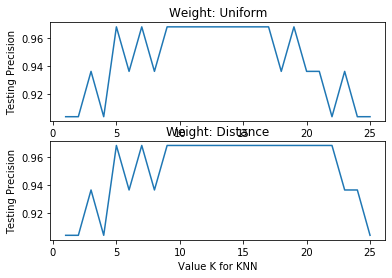

In [236]:
# fig = plt.figure() 
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(k_range,list_score_uniform)
ax1.set_xlabel("Value K for KNN")
ax1.set_ylabel("Testing Precision")
ax1.set_title("Weight: Uniform",loc='center')

ax2.plot(k_range,list_score_distance)
ax2.set_xlabel("Value K for KNN")
ax2.set_ylabel("Testing Precision")
ax2.set_title("Weight: Distance",loc='center')
plt.show()

30 30


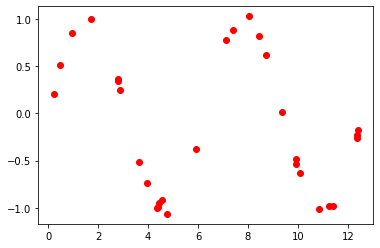

In [237]:
data_size = 30
# random 50 data và sort data có giá trị 0-> 4pi  
# np.random.rand trả về dữ liệu [0,1)
x_train = 4 * np.pi * np.sort(np.random.rand(data_size, 1), axis=0)
# tính y_train bằng hàm sin
y_train = np.sin(x_train).ravel()
# Thêm data nhiễu
y_train = np.array([np.random.normal(y, 0.05) for y in y_train])
print(x_train.size,y_train.size)
plt.plot(x_train, y_train, 'ro');

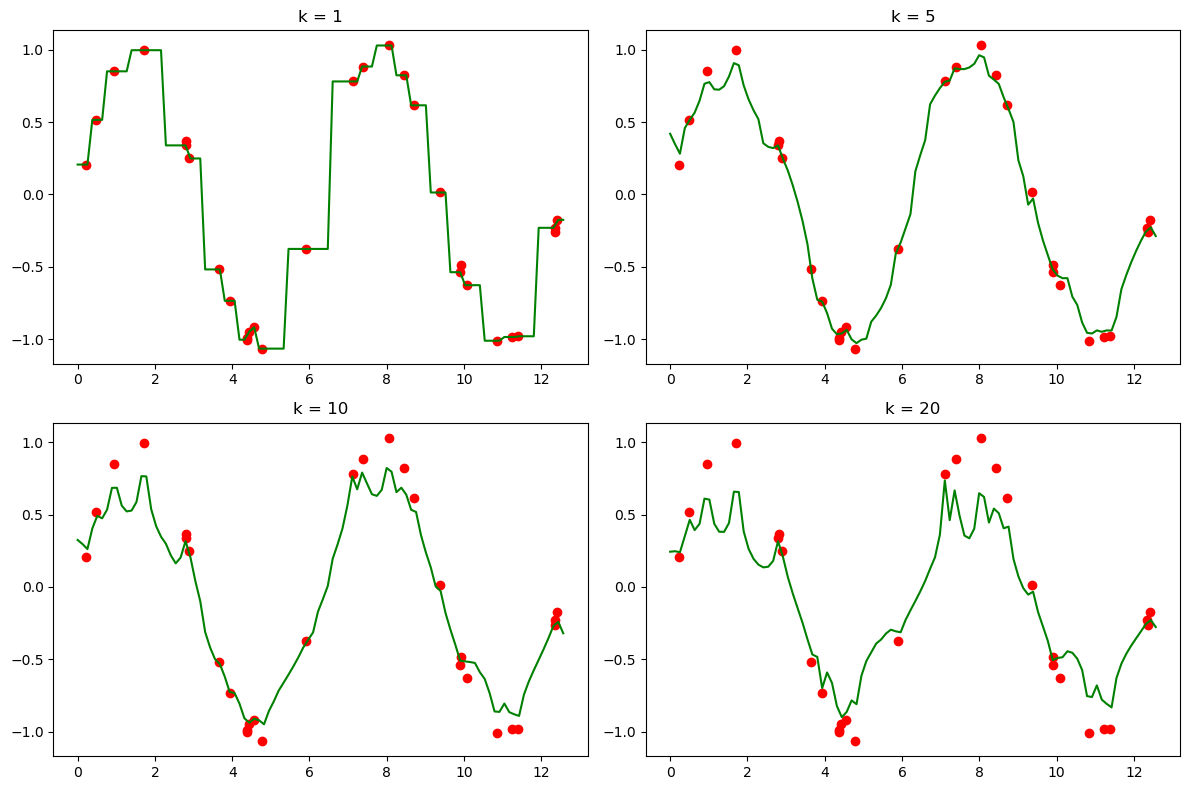

In [238]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

x_test = np.linspace(0, 4*np.pi, 100)[:, np.newaxis]

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

for i, k in enumerate((1, 5, 10, 20)):
  knn = KNeighborsRegressor(k, weights='distance')
  y_test = knn.fit(x_train, y_train).predict(x_test)
  plt.subplot(2, 2, i + 1)

  plt.title("k = {}".format(k))

  plt.plot(x_train, y_train, 'ro', x_test, y_test, 'g');

plt.tight_layout()
